In [1]:
import os 
from dotenv import load_dotenv
load_dotenv()

True

In [2]:
from langchain_openai import AzureChatOpenAI

llm = AzureChatOpenAI(
    azure_endpoint=os.getenv("AZURE_ENDPOINT"),
    api_key=os.getenv("AZUE_OPENAI_API_KEY"),
    azure_deployment=os.getenv("AZURE_DEPLOYMENT_NAME"),
    api_version=os.getenv("AZURE_VERSION")
)

llm.invoke("hi")

AIMessage(content='Hello! How can I assist you today? 😊', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 11, 'prompt_tokens': 8, 'total_tokens': 19, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-11-20', 'system_fingerprint': 'fp_ee1d74bde0', 'id': 'chatcmpl-BnfRgd1eeGr9XdhVLFJH7zvrMQ61O', 'service_tier': None, 'prompt_filter_results': [{'prompt_index': 0, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'jailbreak': {'filtered': False, 'detected': False}, 'self_harm': {'filtered': False, 'severity': 'safe'}, 'sexual': {'filtered': False, 'severity': 'safe'}, 'violence': {'filtered': False, 'severity': 'safe'}}}], 'finish_reason': 'stop', 'logprobs': None, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 

In [3]:
from langchain_core.tools import tool
from langchain_community.tools.tavily_search import TavilySearchResults

In [4]:
TAVILY_API_KEY=os.getenv("TAVILY_API_KEY")
search_tool=TavilySearchResults(tavily_api_key=TAVILY_API_KEY)

In [5]:
@tool
def multiply(x: int, y: int) -> int:
    """Multiplies two numbers."""
    return x * y

In [6]:
multiply({"x":2, "y":3})

C:\Users\User\AppData\Local\Temp\ipykernel_1952\4161870413.py:1: LangChainDeprecationWarning: The method `BaseTool.__call__` was deprecated in langchain-core 0.1.47 and will be removed in 1.0. Use :meth:`~invoke` instead.
  multiply({"x":2, "y":3})


6

In [7]:
@tool
def search(query: str):
    """search the web for a query and return the results"""
    search_tool=TavilySearchResults(tavily_api_key=TAVILY_API_KEY)
    result=search_tool.invoke(query)
    return f"Result for {query} is: \n{result}"

In [8]:
print(search.invoke({"query":"What is the capital of France?"}))

Result for What is the capital of France? is: 
[{'title': 'Paris facts: the capital of France in history', 'url': 'https://home.adelphi.edu/~ca19535/page%204.html', 'content': 'page 4\n\n===============\n\nHomeSpainSydneySan FranciscoParisLas VegasMaui\n\n Paris, France\n\nImage 1\n\nParis facts: Paris, the capital of France\n---------------------------------------------\n\nParis is the capital of France, the largest country of Europe with 550 000 km2 (65 millions inhabitants).\n\nParis has 2.234 million inhabitants end 2011. She is the core of Ile de France region (12 million people). [...] Before Paris, the capital of France was Lyon (under the Romans). Paris first became the capital of France in 508 under King Clovis. After centuries with no unique capital of France, Paris retrieved its status of capital of France under King Philippe Auguste, who reigned between 1180 and 1223. You can see remains of the Philippe August Paris walls in the passageway between the Louvre parking and Lou

In [9]:
tools = [multiply, search]

In [10]:
tools

[StructuredTool(name='multiply', description='Multiplies two numbers.', args_schema=<class 'langchain_core.utils.pydantic.multiply'>, func=<function multiply at 0x0000024E48CE9260>),
 StructuredTool(name='search', description='search the web for a query and return the results', args_schema=<class 'langchain_core.utils.pydantic.search'>, func=<function search at 0x0000024E469FC180>)]

In [11]:
llm_with_tools=llm.bind_tools(tools)

In [12]:
result=llm_with_tools.invoke("what is current gdp of india?")

In [13]:
result.content

''

In [14]:
result.tool_calls

[{'name': 'search',
  'args': {'query': 'current GDP of India 2023'},
  'id': 'call_DJ0vcS8pXWeaZfmYKaWPC6CA',
  'type': 'tool_call'}]

In [15]:
result.tool_calls[0]["name"]

'search'

In [16]:
result.tool_calls[0]["args"]

{'query': 'current GDP of India 2023'}

In [17]:
type(result.tool_calls[0]["args"])

dict

In [18]:
tool_mapping={tool.name:tool for tool in tools}

tool_mapping

{'multiply': StructuredTool(name='multiply', description='Multiplies two numbers.', args_schema=<class 'langchain_core.utils.pydantic.multiply'>, func=<function multiply at 0x0000024E48CE9260>),
 'search': StructuredTool(name='search', description='search the web for a query and return the results', args_schema=<class 'langchain_core.utils.pydantic.search'>, func=<function search at 0x0000024E469FC180>)}

In [19]:
tool_mapping["search"]

StructuredTool(name='search', description='search the web for a query and return the results', args_schema=<class 'langchain_core.utils.pydantic.search'>, func=<function search at 0x0000024E469FC180>)

In [20]:
#manually i am passing here
tool_mapping["search"].invoke({"query":"What is the capital of india?"})

'Result for What is the capital of india? is: \n[{\'title\': \'What is the Capital of India? - Mappr\', \'url\': \'https://www.mappr.co/capital-cities/india/\', \'content\': \'What is the Capital of India?\\n=============================\\n\\nNew Delhi is the capital of India. A cosmopolitan city in South Asia, New Delhi is home to a diverse population that speaks many different languages and holds a wide variety of religious beliefs. The city of New Delhi is part of the larger Delhi Metro Area whose population is over 32 million, and it is well-known for its chaotic traffic and large crowds. [...] New Delhi was not always the capital of India. Prior to 1911, Calcutta was the capital city of the country. India was under British rule at this time, and it was decided to move the capital away from Calcutta due to the intense anti-colonial sentiments that existed there.\\n\\nImage 4: A bustling street with various vehicles, roadside billboards, and urban development on both sides.\\n\\nTra

In [21]:
tool_mapping[result.tool_calls[0]["name"]].invoke(result.tool_calls[0]["args"])

'Result for current GDP of India 2023 is: \n[{\'title\': \'India GDP - TRADING ECONOMICS\', \'url\': \'https://tradingeconomics.com/india/gdp\', \'content\': \'The Gross Domestic Product (GDP) in India was worth 3567.55 billion US dollars in 2023, according to official data from the World Bank. The GDP value of India represents 3.38 percent of the world economy. This page provides the latest reported value for - India GDP - plus previous releases, historical high and low, short-term forecast and long-term prediction, economic calendar, survey\', \'score\': 0.9314689}, {\'title\': \'India GDP - Gross Domestic Product 2023 | countryeconomy.com\', \'url\': \'https://countryeconomy.com/gdp/india?year=2023\', \'content\': \'The GDP figure in 2023 was €3,364,051$3,638,490 million, leaving India placed 5th in the ranking of GDP of the 196 countries that we publish. The absolute value of GDP in India rose €189,006$209,978 million with respect to 2022. [...] The GDP per capita of India in 2023 

In [22]:
from typing import TypedDict, Sequence, Annotated
import operator
from langchain_core.messages import BaseMessage

In [23]:
class AgentState(TypedDict):
    """State for the agent."""
    messages: Annotated[Sequence[BaseMessage],operator.add]

In [24]:
def invoke_model(state:AgentState):
    messages=state["messages"]
    question=messages[-1]
    response=llm_with_tools.invoke(question)
    return {"messages":[response]}

In [25]:
def router(state:AgentState):
    tool_calls=state["messages"][-1].tool_calls
    if len(tool_calls)>0:
        return "tool"
    else:
        return "end"

In [26]:
def invoke_tool(state:AgentState):
    tool_details=state["messages"][-1].tool_calls
    
    if tool_details is None:
        return Exception("No tool calls found in the last message.")
    
    print(f"Seleted tool: {tool_details[0]['name']}")
    
    if tool_details[0]["name"]=="search":
        response=input(prompt=f"[yes/no] do you want to continue with this expensive web search")
        if response.lower()=="no":
            print("web search discarded by the user. exiting gracefully")
            raise Exception("Web search discarded by the user.")
            
    
    response=tool_mapping[tool_details[0]["name"]].invoke(tool_details[0]["args"])
    return {"messages":[response]}

In [27]:
tools

[StructuredTool(name='multiply', description='Multiplies two numbers.', args_schema=<class 'langchain_core.utils.pydantic.multiply'>, func=<function multiply at 0x0000024E48CE9260>),
 StructuredTool(name='search', description='search the web for a query and return the results', args_schema=<class 'langchain_core.utils.pydantic.search'>, func=<function search at 0x0000024E469FC180>)]

In [28]:
from langgraph.graph import StateGraph, START,END

In [29]:
graph=StateGraph(AgentState)

In [30]:
graph.add_node("ai_assistant", invoke_model)

In [31]:
graph.add_node("tool", invoke_tool)

In [32]:
graph.add_conditional_edges("ai_assistant",
                            router,
                            {
                                "tool":"tool",
                                "end":END
                            }
                            )

In [33]:
graph.add_edge("tool", END)

In [34]:
graph.set_entry_point("ai_assistant")

In [35]:
app=graph.compile()

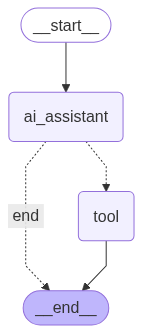

In [36]:
# View the Graph
from IPython.display import display,Image
display(Image(app.get_graph().draw_mermaid_png()))

In [37]:
app.invoke({"messages":["What is the current gdp of the india?"]})

Seleted tool: search


{'messages': ['What is the current gdp of the india?',
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_mffTMLyM5taPxn1dwt8Lto6J', 'function': {'arguments': '{"query":"current GDP of India 2023"}', 'name': 'search'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 20, 'prompt_tokens': 80, 'total_tokens': 100, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-11-20', 'system_fingerprint': 'fp_ee1d74bde0', 'id': 'chatcmpl-BnfRw0fTO22G9xxWXDbQDAwmNn2Ep', 'service_tier': None, 'prompt_filter_results': [{'prompt_index': 0, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'jailbreak': {'filtered': False, 'detected': False}, 'self_harm': {'filtered': False, 'severity': 'safe'}, 'sexual': {'filtered': False, 'severity'

In [38]:
app.invoke({"messages":["What is the multiplication of 5 and 20?"]})

Seleted tool: multiply


{'messages': ['What is the multiplication of 5 and 20?',
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_0hCZQottvKEPn7BQGvfvdkzy', 'function': {'arguments': '{"x":5,"y":20}', 'name': 'multiply'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 18, 'prompt_tokens': 81, 'total_tokens': 99, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-11-20', 'system_fingerprint': 'fp_ee1d74bde0', 'id': 'chatcmpl-BnfS7ttPFigAgsSuaAGIKVgWvhu4n', 'service_tier': None, 'prompt_filter_results': [{'prompt_index': 0, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'jailbreak': {'filtered': False, 'detected': False}, 'self_harm': {'filtered': False, 'severity': 'safe'}, 'sexual': {'filtered': False, 'severity': 'safe'}, 'violence

In [39]:
app.invoke({"messages":["What is the current gdp of the india in 2025?"]})

Seleted tool: search


{'messages': ['What is the current gdp of the india in 2025?',
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_Nu6RZDoKyWkJDsI97Whf4RqL', 'function': {'arguments': '{"query":"current GDP of India in 2025"}', 'name': 'search'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 21, 'prompt_tokens': 84, 'total_tokens': 105, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-11-20', 'system_fingerprint': 'fp_ee1d74bde0', 'id': 'chatcmpl-BnfS8anXF5CVkplW5wsRyURdMEiSK', 'service_tier': None, 'prompt_filter_results': [{'prompt_index': 0, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'jailbreak': {'filtered': False, 'detected': False}, 'self_harm': {'filtered': False, 'severity': 'safe'}, 'sexual': {'filtered': False,

In [40]:
app.invoke({"messages":["what is a latest news of bengaluru?"]})

Seleted tool: search


{'messages': ['what is a latest news of bengaluru?',
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_fSxaDU0jjYZnxJzKtvE3bBX1', 'function': {'arguments': '{"query":"latest news Bengaluru"}', 'name': 'search'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 80, 'total_tokens': 96, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-11-20', 'system_fingerprint': 'fp_ee1d74bde0', 'id': 'chatcmpl-BnfSIrKyWbbeVCaItTddHBJBn3uzL', 'service_tier': None, 'prompt_filter_results': [{'prompt_index': 0, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'jailbreak': {'filtered': False, 'detected': False}, 'self_harm': {'filtered': False, 'severity': 'safe'}, 'sexual': {'filtered': False, 'severity': 'safe

### LangGraph inbuilt Human-in-Loop

In [41]:
tools

[StructuredTool(name='multiply', description='Multiplies two numbers.', args_schema=<class 'langchain_core.utils.pydantic.multiply'>, func=<function multiply at 0x0000024E48CE9260>),
 StructuredTool(name='search', description='search the web for a query and return the results', args_schema=<class 'langchain_core.utils.pydantic.search'>, func=<function search at 0x0000024E469FC180>)]

In [42]:
from langgraph.prebuilt import ToolNode, tools_condition
tool_node=ToolNode(tools)

In [43]:
class AgentState(TypedDict):
    messages: Annotated[Sequence[BaseMessage], operator.add]

In [44]:
llm_with_tools=llm.bind_tools(tools)

In [45]:
def ai_assistant(state:AgentState):
    response=llm_with_tools.invoke(state["messages"])
    return {"messages":[response]}

In [46]:
from langgraph.checkpoint.memory import MemorySaver

In [47]:
memory=MemorySaver()

In [48]:
graph_builder=StateGraph(AgentState)

In [49]:
graph_builder.add_node("ai_assistant", ai_assistant)

In [50]:
graph_builder.add_node("tools", tool_node)

In [51]:
graph_builder.add_edge(START,"ai_assistant")

In [52]:
graph_builder.add_conditional_edges("ai_assistant",
                                    tools_condition,
                                    )

In [53]:
graph_builder.add_edge("tools", "ai_assistant")

In [54]:
app2=graph_builder.compile(checkpointer=memory,interrupt_before=["tools"])

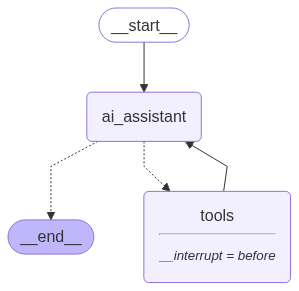

In [55]:
from IPython.display import Image, display
display(Image(app2.get_graph().draw_mermaid_png()))

In [56]:
config={"configurable":{"thread_id":"1"}}

In [57]:
from langchain_core.messages import HumanMessage
response=app2.invoke({"messages":[HumanMessage("What is the current gdp of the china?")]},config=config)

In [58]:
response

{'messages': [HumanMessage(content='What is the current gdp of the china?', additional_kwargs={}, response_metadata={}),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_S35LigaMDYdRSnGGTl18RFSh', 'function': {'arguments': '{"query":"Current GDP of China"}', 'name': 'search'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 80, 'total_tokens': 97, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-11-20', 'system_fingerprint': 'fp_ee1d74bde0', 'id': 'chatcmpl-BnfSRDxgv4dluUfFgDJIVjarCZ9a2', 'service_tier': None, 'prompt_filter_results': [{'prompt_index': 0, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'jailbreak': {'filtered': False, 'detected': False}, 'self_harm': {'filtered': False, '

In [59]:
snapshot=app2.get_state(config)

snapshot

StateSnapshot(values={'messages': [HumanMessage(content='What is the current gdp of the china?', additional_kwargs={}, response_metadata={}), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_S35LigaMDYdRSnGGTl18RFSh', 'function': {'arguments': '{"query":"Current GDP of China"}', 'name': 'search'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 80, 'total_tokens': 97, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-11-20', 'system_fingerprint': 'fp_ee1d74bde0', 'id': 'chatcmpl-BnfSRDxgv4dluUfFgDJIVjarCZ9a2', 'service_tier': None, 'prompt_filter_results': [{'prompt_index': 0, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'jailbreak': {'filtered': False, 'detected': False}, 'self_harm': {'

In [60]:
snapshot.next

('tools',)

In [61]:
last_message=snapshot.values["messages"][-1]

In [62]:
last_message

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_S35LigaMDYdRSnGGTl18RFSh', 'function': {'arguments': '{"query":"Current GDP of China"}', 'name': 'search'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 80, 'total_tokens': 97, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-11-20', 'system_fingerprint': 'fp_ee1d74bde0', 'id': 'chatcmpl-BnfSRDxgv4dluUfFgDJIVjarCZ9a2', 'service_tier': None, 'prompt_filter_results': [{'prompt_index': 0, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'jailbreak': {'filtered': False, 'detected': False}, 'self_harm': {'filtered': False, 'severity': 'safe'}, 'sexual': {'filtered': False, 'severity': 'safe'}, 'violence': {'filtered': False, 'severity': 'safe'}}

In [63]:
app2.invoke(None,config)

{'messages': [HumanMessage(content='What is the current gdp of the china?', additional_kwargs={}, response_metadata={}),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_S35LigaMDYdRSnGGTl18RFSh', 'function': {'arguments': '{"query":"Current GDP of China"}', 'name': 'search'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 80, 'total_tokens': 97, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-11-20', 'system_fingerprint': 'fp_ee1d74bde0', 'id': 'chatcmpl-BnfSRDxgv4dluUfFgDJIVjarCZ9a2', 'service_tier': None, 'prompt_filter_results': [{'prompt_index': 0, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'jailbreak': {'filtered': False, 'detected': False}, 'self_harm': {'filtered': False, '

In [64]:
tool_details=last_message.tool_calls

In [65]:
tool_details

[{'name': 'search',
  'args': {'query': 'Current GDP of China'},
  'id': 'call_S35LigaMDYdRSnGGTl18RFSh',
  'type': 'tool_call'}]

In [66]:
tool_details[0]["name"]

'search'

In [67]:
if tool_details[0]["name"]== "search":
    user_input=input(prompt=f"[yes/no] do you want to continue with {tool_details[0]['name']}?").lower()
    if user_input=="no":
        print("web tool discarded")
        raise Exception("Web tool discarded by the user.")
    else:
        response=app2.invoke(None,config)
        print(response)
else:
    response=app2.invoke(None,config)
    print(response)

{'messages': [HumanMessage(content='What is the current gdp of the china?', additional_kwargs={}, response_metadata={}), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_S35LigaMDYdRSnGGTl18RFSh', 'function': {'arguments': '{"query":"Current GDP of China"}', 'name': 'search'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 80, 'total_tokens': 97, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-11-20', 'system_fingerprint': 'fp_ee1d74bde0', 'id': 'chatcmpl-BnfSRDxgv4dluUfFgDJIVjarCZ9a2', 'service_tier': None, 'prompt_filter_results': [{'prompt_index': 0, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'jailbreak': {'filtered': False, 'detected': False}, 'self_harm': {'filtered': False, 'se

In [68]:
app2.invoke(None,config)

{'messages': [HumanMessage(content='What is the current gdp of the china?', additional_kwargs={}, response_metadata={}),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_S35LigaMDYdRSnGGTl18RFSh', 'function': {'arguments': '{"query":"Current GDP of China"}', 'name': 'search'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 80, 'total_tokens': 97, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-11-20', 'system_fingerprint': 'fp_ee1d74bde0', 'id': 'chatcmpl-BnfSRDxgv4dluUfFgDJIVjarCZ9a2', 'service_tier': None, 'prompt_filter_results': [{'prompt_index': 0, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'jailbreak': {'filtered': False, 'detected': False}, 'self_harm': {'filtered': False, '

In [69]:
response=app2.invoke({"messages":[HumanMessage("What is the current gdp of the japan?")]},config=config)

response

{'messages': [HumanMessage(content='What is the current gdp of the china?', additional_kwargs={}, response_metadata={}),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_S35LigaMDYdRSnGGTl18RFSh', 'function': {'arguments': '{"query":"Current GDP of China"}', 'name': 'search'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 80, 'total_tokens': 97, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-11-20', 'system_fingerprint': 'fp_ee1d74bde0', 'id': 'chatcmpl-BnfSRDxgv4dluUfFgDJIVjarCZ9a2', 'service_tier': None, 'prompt_filter_results': [{'prompt_index': 0, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'jailbreak': {'filtered': False, 'detected': False}, 'self_harm': {'filtered': False, '

In [70]:
snapshot=app2.get_state(config)

snapshot.next

('tools',)

In [71]:
last_message=snapshot.values["messages"][-1]

In [72]:
last_message.tool_calls

[{'name': 'search',
  'args': {'query': 'Current GDP of Japan 2023'},
  'id': 'call_V4WVGCP2IQX8lvEw74mcSKts',
  'type': 'tool_call'}]

In [73]:
tool_call_id=last_message.tool_calls[0]["id"]

In [74]:
tool_call_id

'call_V4WVGCP2IQX8lvEw74mcSKts'

In [75]:
from langchain_core.messages import AIMessage,ToolMessage

In [76]:
new_message=[
    ToolMessage(content="according to the latest data 4.1 trillion USD",tool_call_id=tool_call_id),
    AIMessage(content="GDP is 4.1 Trillion USD.")
    
]

In [77]:
app2.update_state(config, 
                  {
                      "messages":new_message
                   }
                  )

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1f054af1-a76c-674b-8007-50124aa743ad'}}

In [78]:
app2.get_state(config).values["messages"][-1]

AIMessage(content='GDP is 4.1 Trillion USD.', additional_kwargs={}, response_metadata={})

In [79]:
app2.invoke(None,config=config)

{'messages': [HumanMessage(content='What is the current gdp of the china?', additional_kwargs={}, response_metadata={}),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_S35LigaMDYdRSnGGTl18RFSh', 'function': {'arguments': '{"query":"Current GDP of China"}', 'name': 'search'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 80, 'total_tokens': 97, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-11-20', 'system_fingerprint': 'fp_ee1d74bde0', 'id': 'chatcmpl-BnfSRDxgv4dluUfFgDJIVjarCZ9a2', 'service_tier': None, 'prompt_filter_results': [{'prompt_index': 0, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'jailbreak': {'filtered': False, 'detected': False}, 'self_harm': {'filtered': False, '

In [80]:
app2.invoke({"messages":[HumanMessage("What is the current gdp of the japan?")]},config=config)

{'messages': [HumanMessage(content='What is the current gdp of the china?', additional_kwargs={}, response_metadata={}),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_S35LigaMDYdRSnGGTl18RFSh', 'function': {'arguments': '{"query":"Current GDP of China"}', 'name': 'search'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 80, 'total_tokens': 97, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-11-20', 'system_fingerprint': 'fp_ee1d74bde0', 'id': 'chatcmpl-BnfSRDxgv4dluUfFgDJIVjarCZ9a2', 'service_tier': None, 'prompt_filter_results': [{'prompt_index': 0, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'jailbreak': {'filtered': False, 'detected': False}, 'self_harm': {'filtered': False, '